In [1]:
%matplotlib inline
from astropy import table
import numpy as np
from pathlib import Path
import betterplotlib as bpl

bpl.set_style()

In [11]:
gal_dir = Path("..").resolve() / "data" / "ngc4449"

In [13]:
whitmore_table = table.Table.read(str(Path("..").resolve() / "pipeline" / "whitmore_2020_data.txt"), format="ascii.cds")

In [14]:
original_catalog_loc = gal_dir / "size" / "cluster_fits_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.h5"
original_catalog = table.Table.read(str(original_catalog_loc), format="hdf5")
original_catalog = original_catalog[original_catalog["class_whitmore"]!=5]

In [15]:
final_catalog_loc = gal_dir / "size" / "final_catalog_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
final_catalog = table.Table.read(str(final_catalog_loc), format="ascii.ecsv")

In [16]:
good_whitmore_class = np.where(whitmore_table["Category"] < 3)

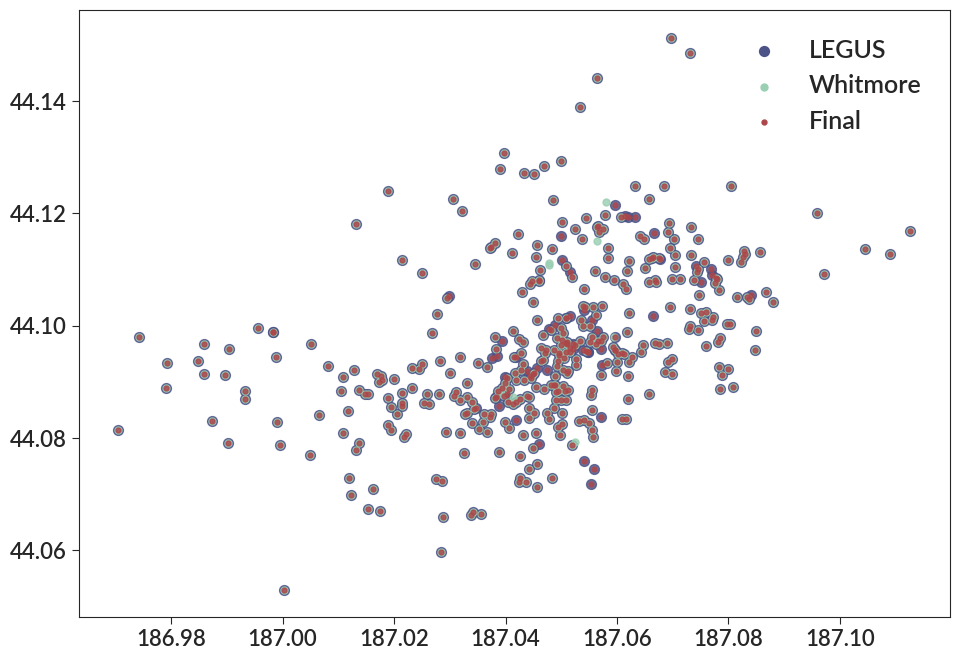

In [17]:
fig, ax = bpl.subplots()
ax.scatter(original_catalog["RA"], original_catalog["Dec"], s=50, label="LEGUS")

ax.scatter(whitmore_table["RAdeg"][good_whitmore_class], 
           whitmore_table["DEdeg"][good_whitmore_class], s=25, label="Whitmore")

ax.scatter(final_catalog["RA"], final_catalog["Dec"], 
           c=bpl.color_cycle[3], s=12.5, label="Final")

# whitmore_added = np.where(whitmore_table["Added"])
# ax.scatter(whitmore_table["RAdeg"][whitmore_added], 
#            whitmore_table["DEdeg"][whitmore_added], 
#            s=10, c=bpl.color_cycle[3], label="Whitmore Added")
ax.legend()

In [18]:
final_catalog["age_err+"] = final_catalog["age_yr_max"] - final_catalog["age_yr"]
final_catalog["age_err-"] = final_catalog["age_yr"] - final_catalog["age_yr_min"]

final_catalog["age_err_legus+"] = final_catalog["age_yr_max_legus"] - final_catalog["age_yr_legus"]
final_catalog["age_err_legus-"] = final_catalog["age_yr_legus"] - final_catalog["age_yr_min_legus"]

final_catalog["mass_err+"] = final_catalog["mass_msun_max"] - final_catalog["mass_msun"]
final_catalog["mass_err-"] = final_catalog["mass_msun"] - final_catalog["mass_msun_min"]

final_catalog["mass_err_legus+"] = final_catalog["mass_msun_max_legus"] - final_catalog["mass_msun_legus"]
final_catalog["mass_err_legus-"] = final_catalog["mass_msun_legus"] - final_catalog["mass_msun_min_legus"]

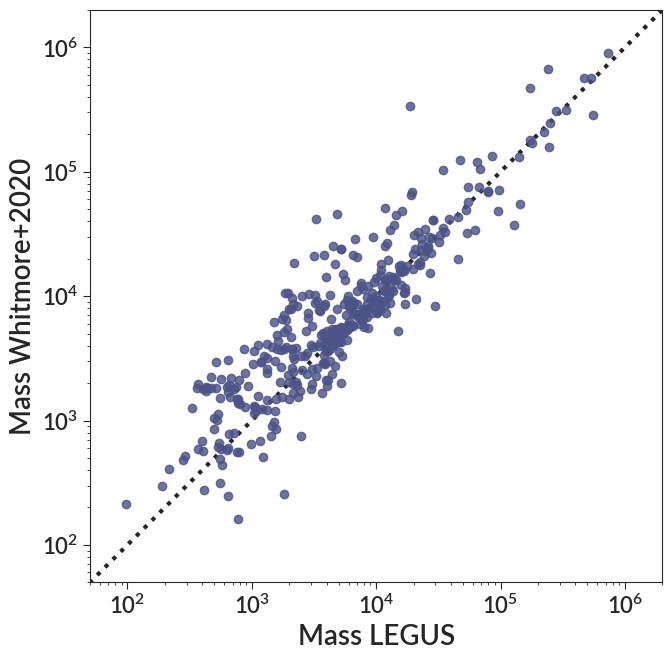

In [19]:
fig, ax = bpl.subplots()
ax.equal_scale()
ax.scatter(final_catalog["mass_msun_legus"], final_catalog["mass_msun"])
# ax.errorbar(final_catalog["mass_msun_legus"], final_catalog["mass_msun"], 
#             xerr=[final_catalog["mass_err_legus-"], final_catalog["mass_err_legus+"]],
#             yerr=[final_catalog["mass_err-"], final_catalog["mass_err+"]])
ax.set_xscale("log")
ax.set_yscale("log")
ax.add_labels("Mass LEGUS", "Mass Whitmore+2020")
ax.set_limits(50, 2e6, 50, 2e6)
ax.plot([1, 1e7], [1, 1e7], ls=":", c=bpl.almost_black, zorder=0)

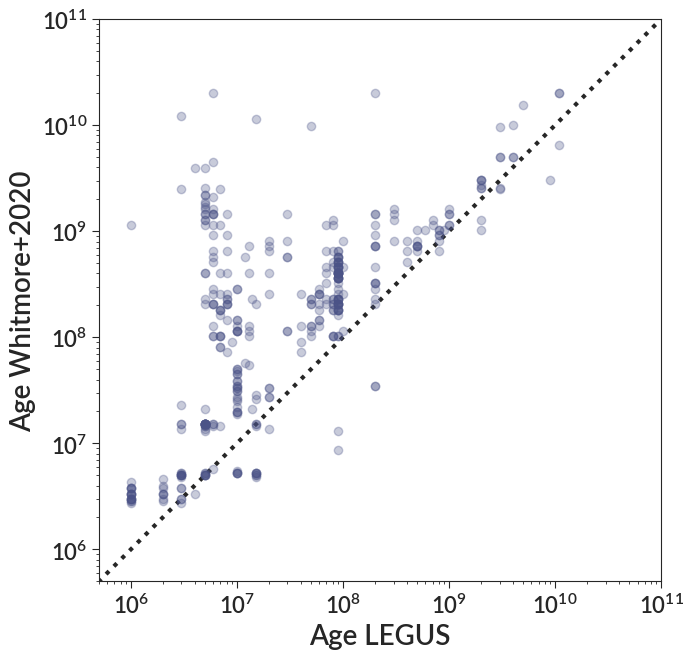

In [20]:
fig, ax = bpl.subplots()
ax.equal_scale()
# ax.errorbar(final_catalog["age_yr_legus"], final_catalog["age_yr"], 
#             xerr=[final_catalog["age_err_legus-"], final_catalog["age_err_legus+"]],
#             yerr=[final_catalog["age_err-"], final_catalog["age_err+"]])
ax.scatter(final_catalog["age_yr_legus"], final_catalog["age_yr"], alpha=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.add_labels("Age LEGUS", "Age Whitmore+2020")
ax.set_limits(5e5, 1e11, 5e5, 1e11)
ax.plot([1, 1e12], [1, 1e12], ls=":", c=bpl.almost_black, zorder=0)